In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\timos\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('DL_FIRE_M6_138850/fire_archive_M6_13885.csv')

In [3]:
df.head(3)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3827,-155.0442,307.0,1.0,1.0,2010-01-01,842,Terra,MODIS,70,6.2,291.2,8.3,N,2
1,19.3814,-155.0539,319.8,1.0,1.0,2010-01-01,842,Terra,MODIS,99,6.2,294.9,19.0,N,2
2,19.3904,-155.0554,304.1,1.0,1.0,2010-01-01,842,Terra,MODIS,59,6.2,290.6,6.6,N,2


In [5]:
df.scan.unique()

array([1. , 1.3, 1.1, 1.6, 1.4, 3.4, 1.2, 2.3, 2.5, 1.9, 2. , 2.1, 4.1,
       3.9, 3. , 2.6, 1.7, 2.7, 1.5, 2.2, 2.8, 4.2, 1.8, 3.8, 4.4, 3.5,
       3.7, 4.3, 2.4, 2.9, 4.8, 3.1, 3.2, 4.7, 4.6, 3.3, 4. , 3.6, 4.5])

In [6]:
df.track.unique()

array([1. , 1.1, 1.2, 1.7, 1.5, 1.3, 1.4, 1.9, 1.8, 1.6, 2. ])

In [7]:
df.shape

(1211376, 15)

In [11]:
df_narrow = df.drop(['latitude','longitude','instrument'], axis = 1)

In [12]:
df_narrow.shape

(1211376, 12)

In [13]:
df_narrow.corr()

,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
brightness,1.000000,-0.042885,-0.042529,0.130056,0.607226,-0.020150,0.584772,0.635554,0.006271
scan,-0.042885,1.000000,0.983206,0.004446,-0.035086,-0.017166,-0.081238,0.204338,-0.012470
track,-0.042529,0.983206,1.000000,0.006370,-0.033635,-0.017581,-0.082802,0.199867,-0.009975
acq_time,0.130056,0.004446,0.006370,1.000000,-0.049109,0.030018,0.321042,0.022118,-0.154574
confidence,0.607226,-0.035086,-0.033635,-0.049109,1.000000,-0.025257,0.264095,0.264814,0.033393
version,-0.020150,-0.017166,-0.017581,0.030018,-0.025257,1.000000,-0.028463,-0.020058,0.003276
bright_t31,0.584772,-0.081238,-0.082802,0.321042,0.264095,-0.028463,1.000000,0.316137,-0.048143
frp,0.635554,0.204338,0.199867,0.022118,0.264814,-0.020058,0.316137,1.000000,-0.001872
type,0.006271,-0.012470,-0.009975,-0.154574,0.033393,0.003276,-0.048143,-0.001872,1.000000


<AxesSubplot:>

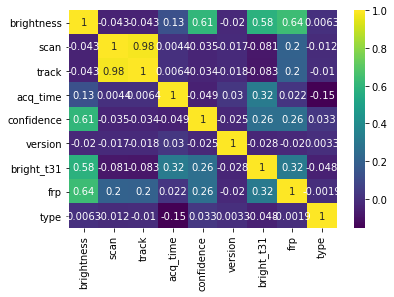

In [14]:
plt.figsize=(40,20)
sns.heatmap(df_narrow.corr(), cmap='viridis',annot=True)

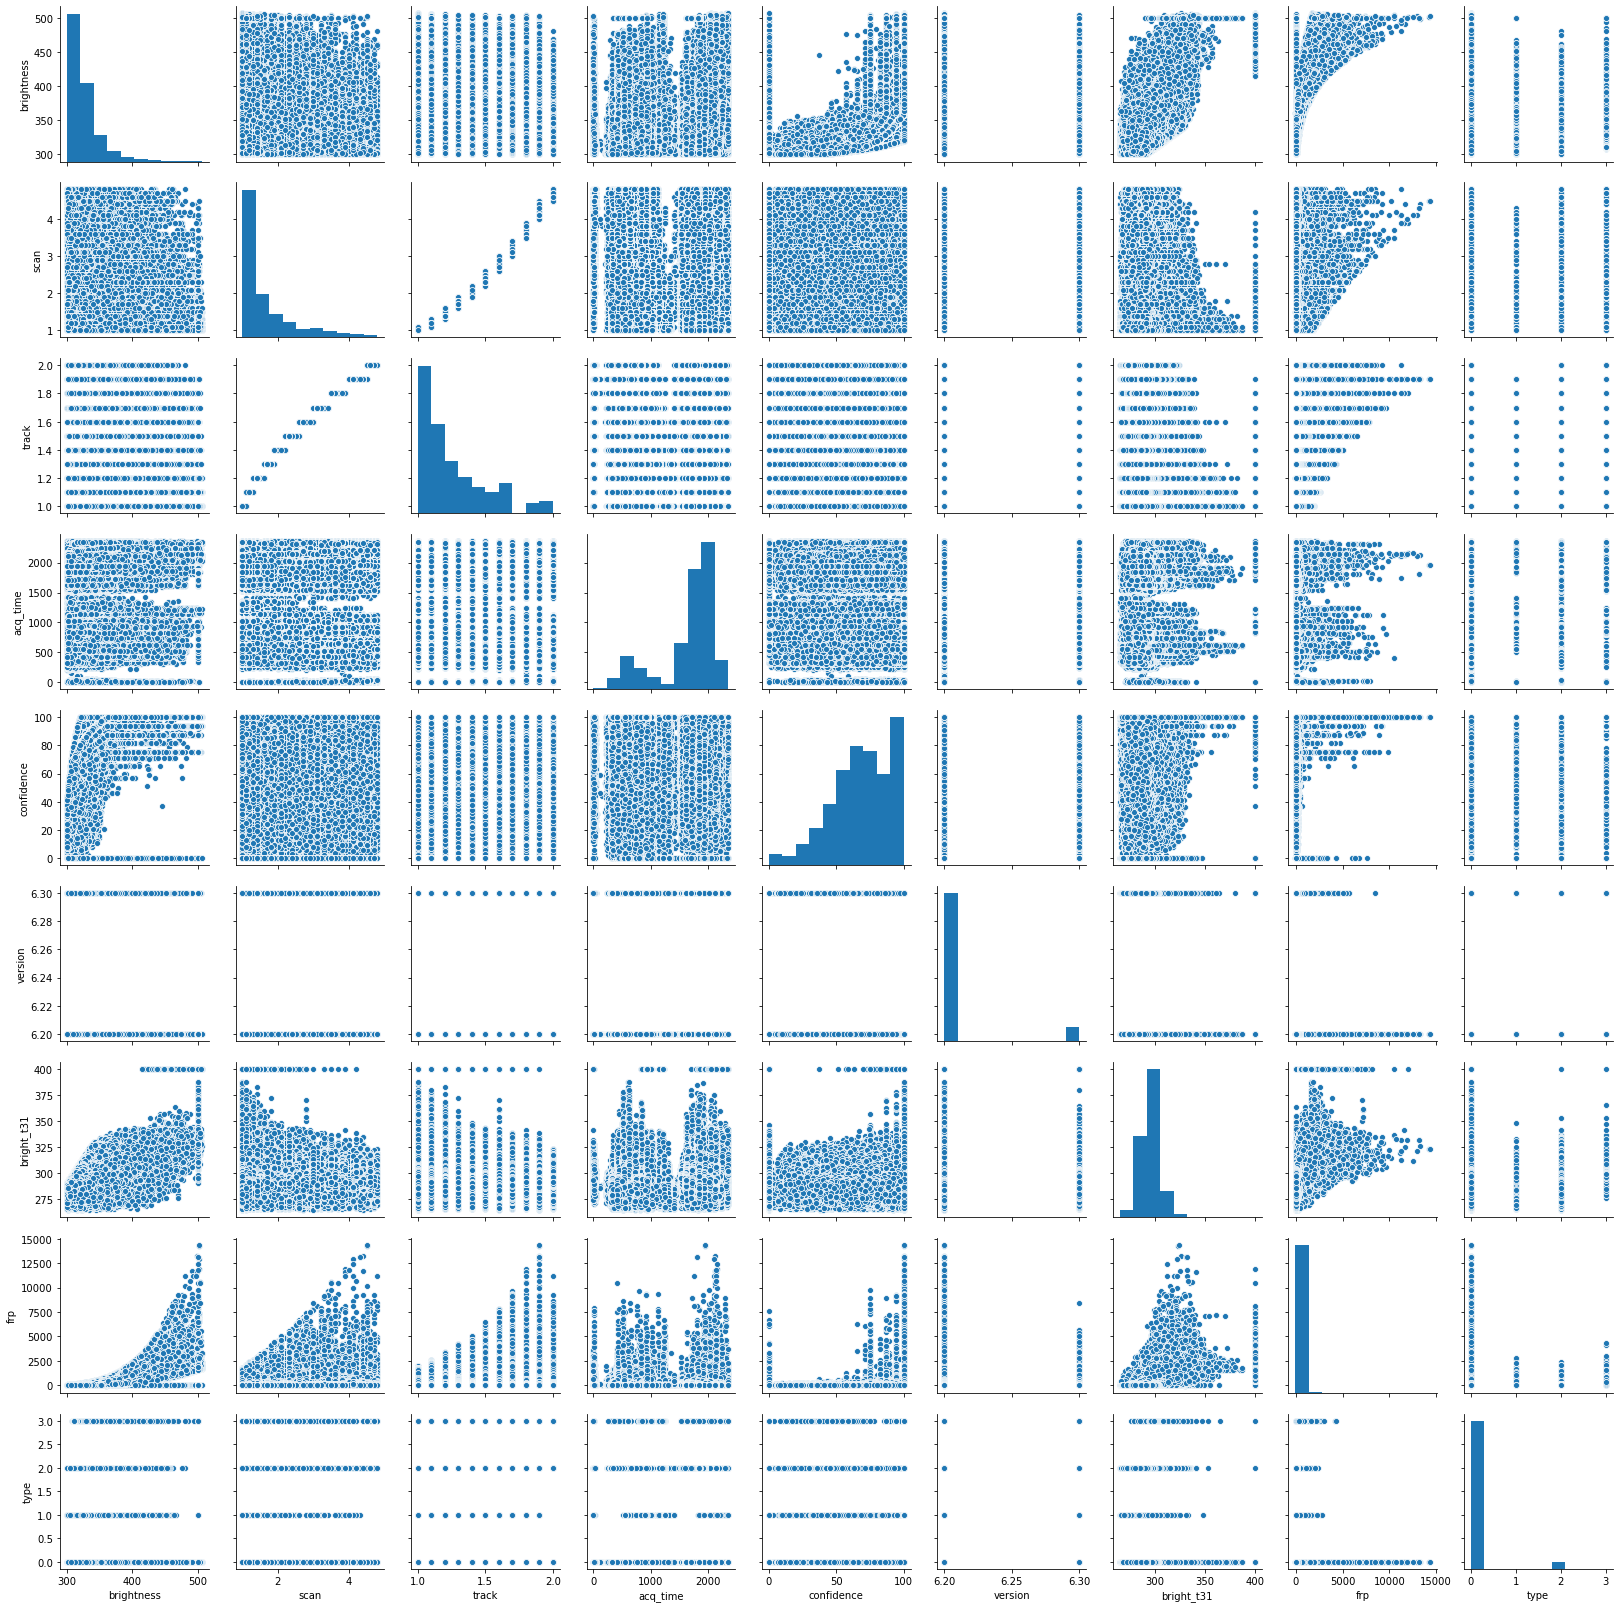

In [15]:
sns.pairplot(df_narrow)

In [17]:
df_highcon = df[df['confidence'] >= 70]

In [18]:
df_highcon.shape

(604928, 15)

In [19]:
df_highcon.head(3)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3827,-155.0442,307.0,1.0,1.0,2010-01-01,842,Terra,MODIS,70,6.2,291.2,8.3,N,2
1,19.3814,-155.0539,319.8,1.0,1.0,2010-01-01,842,Terra,MODIS,99,6.2,294.9,19.0,N,2
3,19.3891,-155.0651,317.5,1.0,1.0,2010-01-01,842,Terra,MODIS,95,6.2,292.5,16.9,N,2


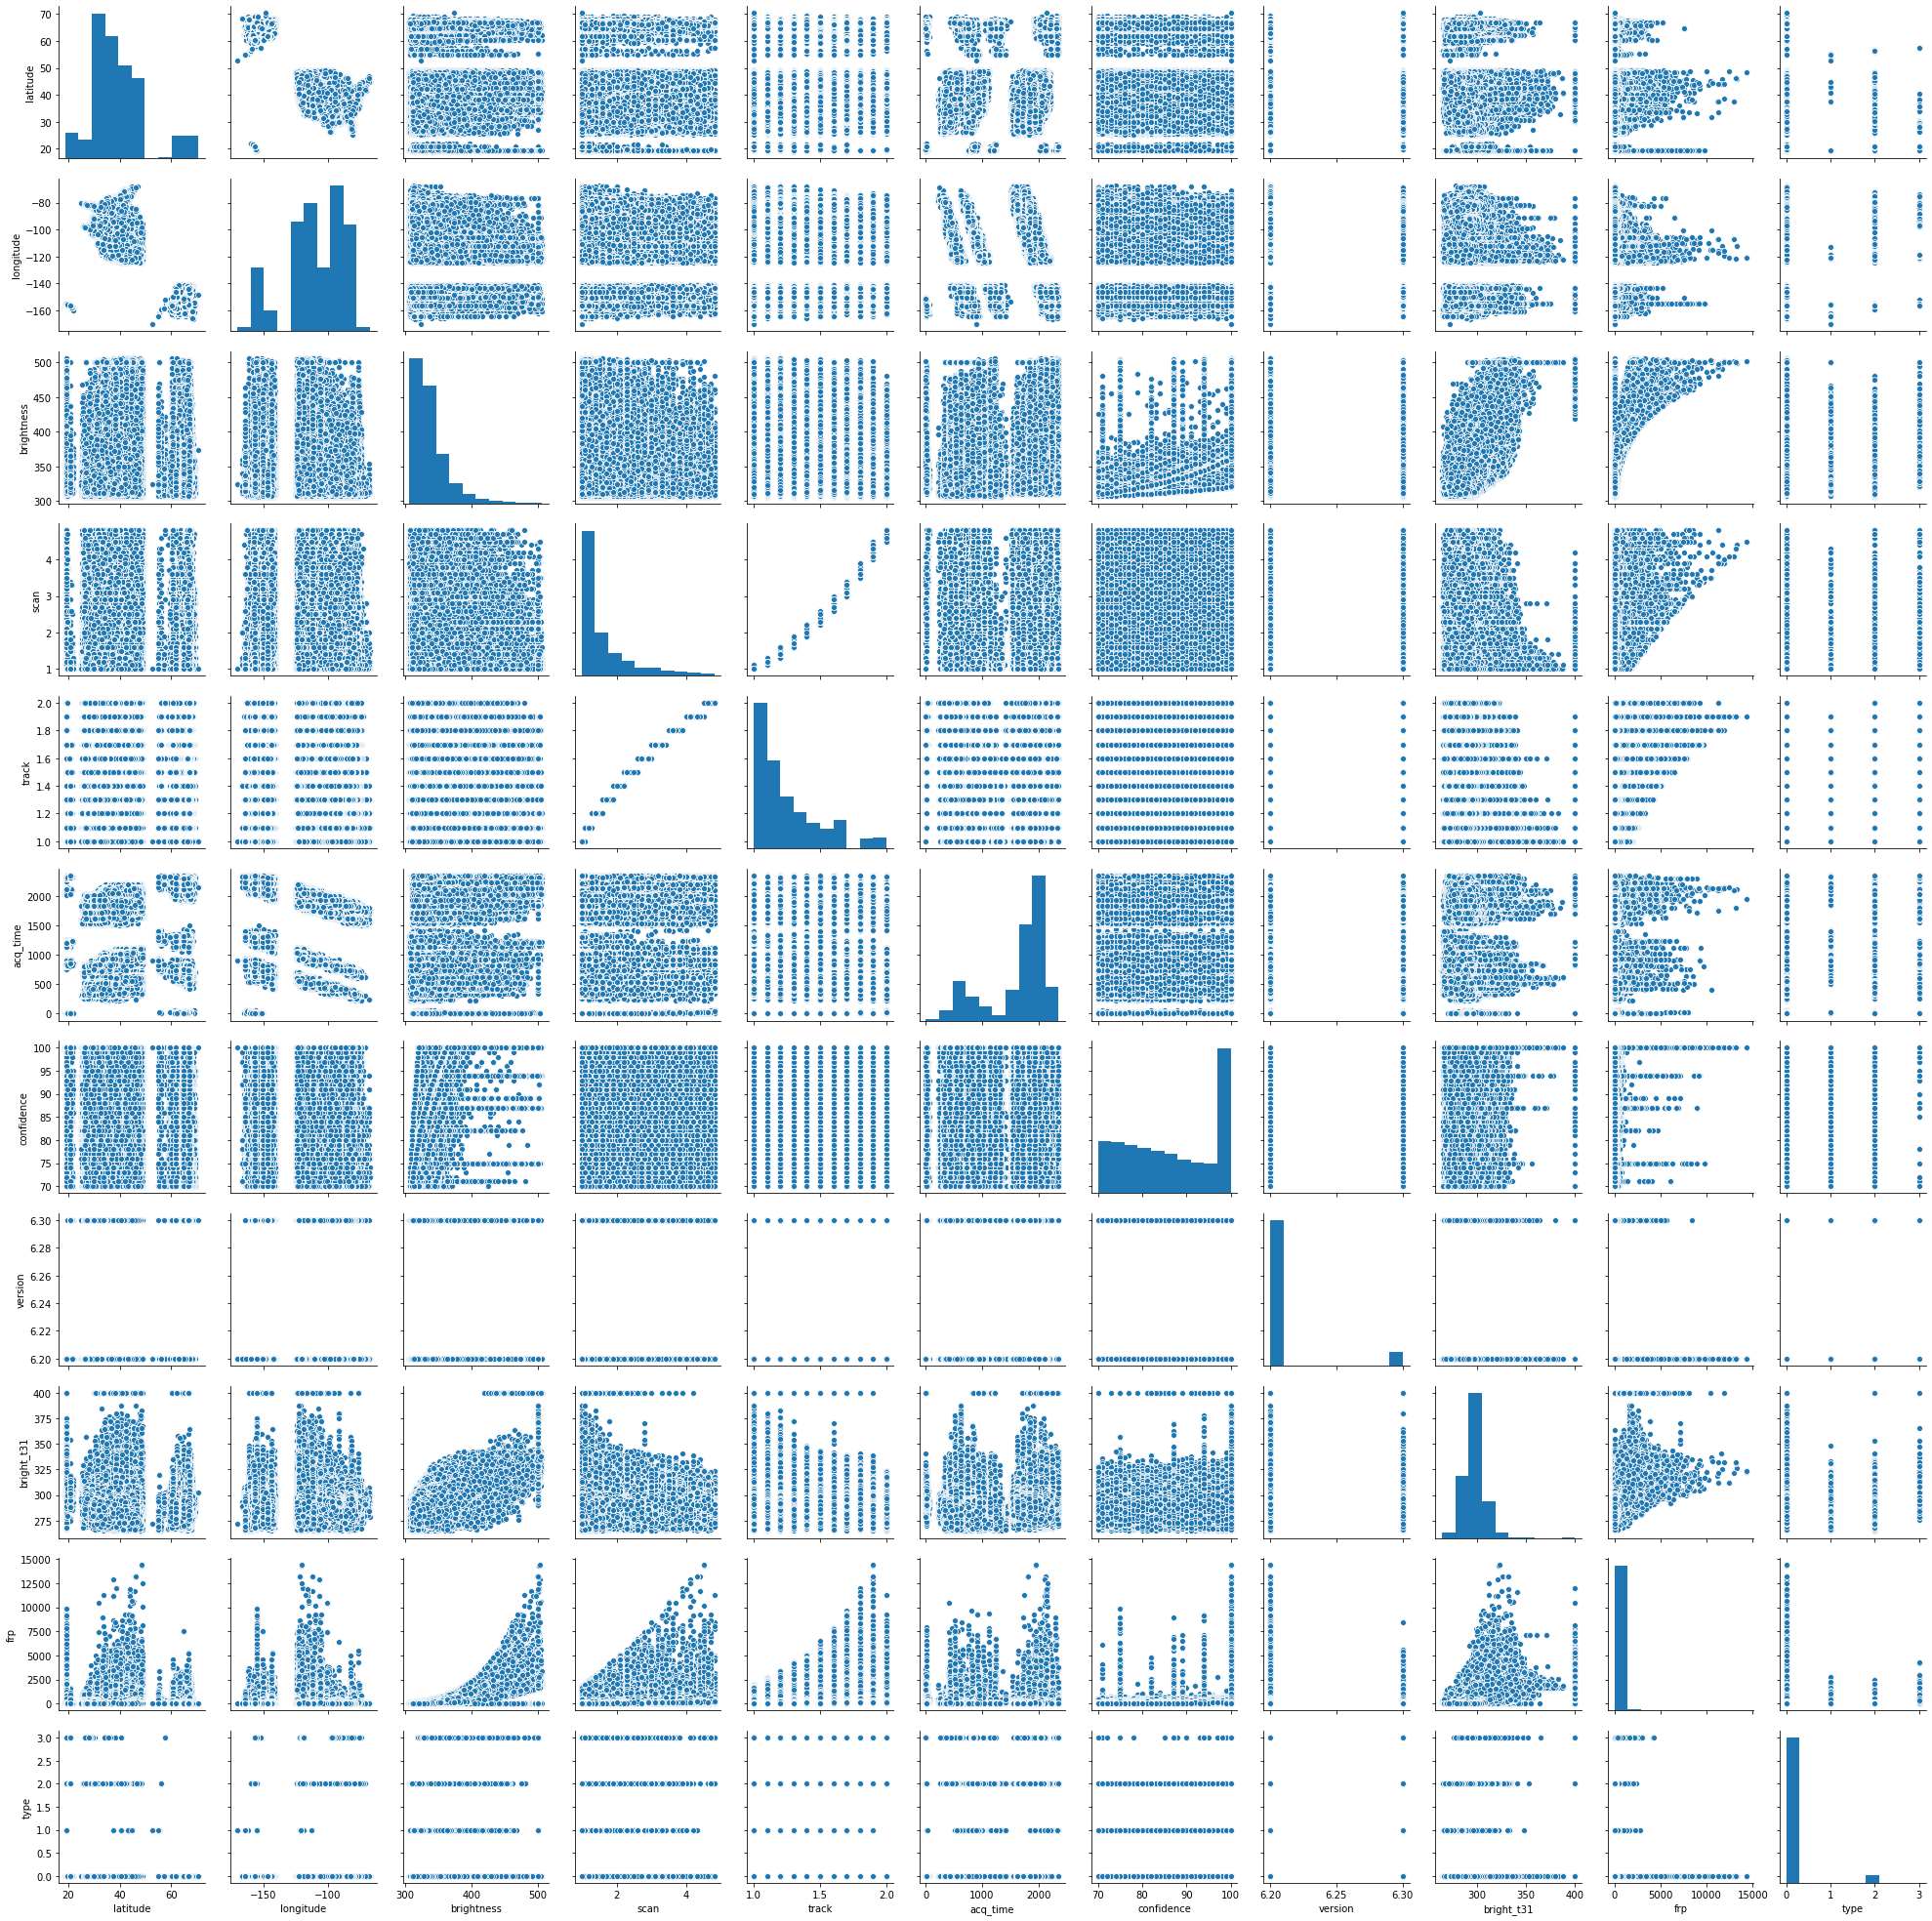

In [20]:
sns.pairplot(df_highcon)

In [36]:
df_highcon['frp'].value_counts()

0.0       1308
15.2      1262
14.2      1229
17.3      1214
14.9      1211
          ... 
713.2        1
2746.4       1
883.9        1
4140.5       1
1710.7       1
Name: frp, Length: 15919, dtype: int64

In [37]:
df['frp'].min()

-59.2

<AxesSubplot:xlabel='acq_date', ylabel='brightness'>

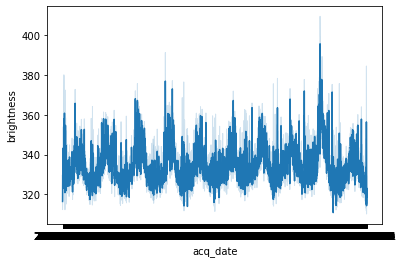

In [38]:
sns.lineplot(x='acq_date',y='brightness',data=df_highcon)